# MVP de análise de dados do desempenho de alunos do Ensino Médio na prova SAEB
Aluna: Nathalia Vasconcelos Cardoso Rodrigues

### 1. Introdução

O presente MVP busca avaliar dados de desempenho de alunos do Ensino Médio, oriundos de escolas Municipais, Estaduais e Federais, na disciplina de Língua Portuguesa no Sistema de Avaliação da Educação Básica - SAEB - para os anos de 2017, 2019, 2021 e 2023.

O SAEB pode ser definido como um conjunto de avaliações externas cuja finalidade é permitir ao Instituto Nacional de Estudos e Pesquisas Educacionais Anísio Teixeira (Inep) um diagnóstico do desempenho dos alunos e de possíveis fatores que possam prejudicá-lo. Essa aferição é realizada de 2 em 2 anos por meio de testes e questionários. Posteriormente, essas médias de desempenho dos estudantes, apuradas no Saeb, juntamente com as taxas de aprovação, reprovação e abandono escolar, apuradas no Censo Escolar, integrarão o cálculo do Índice de Desenvolvimento da Educação Básica (Ideb). Desta forma, pode-se perceber a importância dos resultados obtidos pelo SAEB para o diagnóstico do panorama educacional nacional. 

De forma a tornar a análise aqui realizada mais rica, será feito o cruzamento desses resultados com os dados dos Produtos Internos Brutos (PIBs) dos municípios brasileiros para todos os anos anteriormente mencionados, exceto 2023. Os dados relativos a esse ano não foram encontrados online e, por este motivo, não puderam ser integrados na análise feita neste MVP. Além disso, estão disponíveis no IBGE dados de PIB para os 100 municípios mais ricos do país. Assim, não serão apresentados dados de PIB para todos os municípios do país.

A seguir, serão detalhados mais alguns aspectos basilares para a realização do MVP aqui proposto.




### 1.1. As notas SAEB

Criado em 1990, o SAEB passou por diversas reformulações até chegar ao modelo atual. Aplicada a diversas etapas da escolaridade, a prova é aferida por meio de diversas matrizes de referência. Para a disciplina de Língua Portuguesa do Ensino Médio, matéria e nível escolar aqui investigados, as notas seguem a seguinte matriz de referência: 

Nível 1: Desempenho maior ou igual a 225 e menor que 250;

Nível 2: Desempenho maior ou igual a 250 e menor que 275;

Nível 3: Desempenho maior ou igual a 275 e menor que 300;

Nível 4: Desempenho maior ou igual a 300 e menor que 325;

Nível 5: Desempenho maior ou igual a 325 e menor que 350;

Nível 6: Desempenho maior ou igual a 350 e menor que 375;

Nível 7: Desempenho maior ou igual a 375 e menor que 400;

Nível 8: Desempenho maior ou igual a 400.

Dado que algumas perguntas perguntas de investigação dizem respeito ao desempenho dos alunos, torna-se importante clarificar a escala de notas adotada pela prova SAEB.


### 1.2. Perguntas de investigação e hipóteses



Para orientar o desenvolvimento deste MVP, estabeleceu-se algumas perguntas de investigação e hipósteses:

1) O desempenho dos alunos, por município, ao longo dos anos piorou, melhorou ou manteve-se estável?
2) Pensando no país como um todo, há diferenças de desempenho entre os alunos da rede estadual e federal?
3) Considerando cada uma das 5 regiões, há diferenças de desempenho entre os alunos da rede estadual e federal?
4) Há alguma relação entre um melhor desempenho e o PIB da região a qual o aluno pertence?
5) Quais os municípios ocupam as 5 melhores posições em relação ao seu desempenho no SAEB para cada ano? Esses mesmos municípios estão entre os 100 maiores PIBs do país? 
6) Quantos municípios, de cada uma das 5 regiões do Brasil, Norte, Sul, Sudeste, Nordeste e Centro-Oeste, alcançaram o valor 400 nas notas finais?
7) Quais foram as tendências de desempenho do SAEB ao longo dos governos?

Como hipóteses, postula-se que os municípios situados entre os 100 mais ricos do país apresentarão melhores resultados na prova SAEB. O mesmo valeria para as regiões do país: regiões mais ricas apresentariam melhor desempenho nas provas SAEB.


### 1.3. Descrição dos datasets

Os resultados dos alunos na prova SAEB foram obtidos no site dados.gov.br, plataforma de dados abertos do Governo Federal. O tipo de licença para uso desses dados é Creative Commons Attribution. O dataset original é composto por 17 colunas. No entanto, neste trabalho serão trabalhadas apenas as seguintes colunas: Sigla da UF, Código do Município, Nome do Município, Rede, Língua Portuguesa SAEB -2017, Língua Portuguesa SAEB -2019, Língua Portuguesa SAEB - 2021 e Língua Portuguesa SAEB - 2023. Destaca-se ainda que os dados originais foram tansformados para o formato csv para serem lidos pelo Databricks Community. 

Já o dataset para as os dados de PIB foi obtido a partir de consultas no site do IBGE. Tais consultas retornavam como resultado dados para os anos de 2017, 2019 e 2021 em arquivos xlsx separadamente. Os dados foram unidos em apenas um arquivo csv e dispõe das seguintes colunas: Municí­pios e respectivas UF, Posição ocupada, PIB, Participação (%), Participação acumulada e Ano. 

As fontes de cada diretório foram disponibilizadas na secção "Materiais e ferramentas utilizados". Os datasets em si estão no GitHub disponibilizado.

### 2. Extração, transformação e carga dos dados

Nesta secção, serão feitas a extração, transformação e carga os dados para a camada bronze. Os dados serão extraídos com o código spark.read.csv(), transformados com o inferschema e a carga será feita com o Parquet.

In [0]:
# Carregando dados sobre os resultados SAEB na camada bronze
# Lendo o arquivo CSV
df_bronze = spark.read.csv("/FileStore/tables/ensino_medio_SAEB-4.csv", header=True, inferSchema=True) 

# Caminho para salvar os dados em formato Parquet
parquet_path = "/FileStore/parquet/ensinomediobronze"

# Salvar os dados como Parquet
df_bronze.write.format("parquet").mode("overwrite").save(parquet_path)

In [0]:
# Carregando dados sobre os resultados SAEB na camada bronze
# Lendo o arquivo CSV
df_bronze = spark.read.csv("dbfs:/FileStore/tables/PIB_anos-1.csv", header=True, inferSchema=True) 

# Caminho para salvar os dados em formato Parquet
parquet_path = "dbfs:/FileStore/parquet/pibbronze"

# Salvar os dados como Parquet
df_bronze.write.format("parquet").mode("overwrite").save(parquet_path)

### 3. Modelagem dos dados

### 3.1. Camada bronze

Nesta secção, serão criadas as tabelas "EnsinoSAEB_bronze" e "PIBgeral_bronze" na camada bronze. As estruturas de tais tabelas correspondem às estruturas originais. 

In [0]:
%sql
--- Criação do Database Bronze para salvar os dados das tabelas criadas nesta camada
CREATE DATABASE IF NOT EXISTS bronze;

In [0]:
%sql
--- Criação da tabela contendo os dados relativos ao SAEB
CREATE TABLE EnsinoSAEB_bronze
USING CSV
OPTIONS (
  path '/FileStore/tables/ensino_medio_SAEB-4.csv',
  header 'true',
  inferSchema 'true',
  delimiter ';',
  encoding 'UTF-8'
);

In [0]:
%sql
---- Checando a criação da tabela e os seus dados
SELECT * FROM EnsinoSAEB_bronze LIMIT 10;

Sigla da UF Código do Município Nome do Município Rede Língua Portuguesa SAEB -2017 Língua Portuguesa SAEB -2019 Língua Portuguesa SAEB - 2021 Língua Portuguesa SAEB - 2023 RO 1100015 Alta Floresta D'Oeste Estadual 260,96 278,52 266,52 273,68 RO 1100015 Alta Floresta D'Oeste Pública 260,96 278,52 266,52 273,68 RO 1100023 Ariquemes Estadual 267,82 277,61 269,05 271,11 RO 1100023 Ariquemes Federal ND ND - ND RO 1100023 Ariquemes Pública 268,22 278,78 269,05 274,56 RO 1100031 Cabixi Estadual 239,01 ND 257,68 256,32 RO 1100031 Cabixi Pública 239,01 ND 257,68 256,32 RO 1100049 Cacoal Estadual 254,93 269,97 270,91 260,23 RO 1100049 Cacoal Federal 288,41 318,09 - 305,36 RO 1100049 Cacoal Pública 257,82 278,36 270,91 268,93

In [0]:
%sql
--- Criação da tabela contendo os dados relativos aos PIBs
CREATE TABLE PIBgeral_bronze (
    `Municí­pios e respectivas UF` STRING,
    `Posição ocupada` STRING,
    `PIB`  STRING,
    `Participação (%)` STRING,
    `Participação acumulada` STRING,
    `Ano` STRING
)
USING CSV
OPTIONS (
    path 'dbfs:/FileStore/tables/PIB_anos-1.csv',
    header 'true',
    delimiter ';',
    encoding 'UTF-8'
);

In [0]:
%sql
---- Checando a criação da tabela e os seus dados
SELECT * FROM PIBgeral_bronze LIMIT 10;

Municí­pios e respectivas UF Posição ocupada PIB Participação (%) Participação acumulada Ano São Paulo (SP) 1º 699 288 352 10,62 10,62 2017 Rio de Janeiro (RJ) 2º 337 594 462 5,13 15,75 2017 Brasília (DF) 3º 244 682 756 3,72 19,47 2017 Belo Horizonte (MG) 4º 88 951 168 1,35 20,82 2017 Curitiba (PR) 5º 84 702 357 1,29 22,10 2017 Osasco (SP) 6º 77 910 496 1,18 23,29 2017 Porto Alegre (RS) 7º 73 862 306 1,12 24,41 2017 Manaus (AM) 8º 73 201 651 1,11 25,52 2017 Salvador (BA) 9º 62 717 483 0,95 26,47 2017 Fortaleza (CE) 10º 61 579 403 0,94 27,41 2017

### 3.1.1. Catálogo de Dados - camada bronze


A seguir, é apresentado o catálogo de dados para as tabelas criadas na camada bronze: 

- **TABELA EnsinoSAEB_bronze**

**Sigla da UF**: Coluna em que estão apresentadas as siglas das 27 Unidades da Federação. Os dados desta coluna estão no formato "string". Não há dados nulos nessa coluna. Exemplo: Rio de Janeiro - Sigla: RJ. 

**Código do Município:** Coluna em que são apresentados os códigos identificadores do Instituto Brasileiro de Geografia e Estatística (IBGE) para cada município. Cada código é composto por 7 dígitos, sendo os dois primeiros referentes à unidade da federação. Os dados estão no formato "integer". Não há dados nulos nessa coluna. Exemplo: Rondônia - código 11 | Ariquemes (município do Acre) - código 1100023.

**Nome do Município**: Coluna em que são apresentados os nomes do Municípios de cada Unidade da Federação Brasileira. Não dá dados nulos. Os dados estão no formato "string".

**Rede**: Coluna em que são apresentados a que tipo de rede pertence as escolas, cujos resultados foram avaliados, a saber: pública, estadual ou federal. A nomenclatura "pública", nesse caso, faz referência à rede municipal. Os municípios brasileiros podem ou não apresentar escolas filiadas às três redes com oferta letiva para os anos do Ensino Médio. Os dados estão no formato "string".

**Língua Portuguesa SAEB -2017**: Coluna em que são apresentados os resultados da prova SAEB na disciplina de Língua Portuguesa para o ano de 2017. Há dados no formato "ND" ou "-" para representar dados ausentes. Alguns municípios não atingem a quantidade mínima de alunos para serem avaliados, o que provoca a ausência de dados. Os dados estão no formato "string".

**Língua Portuguesa SAEB -2019**: Coluna em que são apresentados os resultados da prova SAEB na disciplina de Língua Portuguesa para o ano de 2019. Há dados no formato "ND" ou "-" para representar dados ausentes. Alguns municípios não atingem a quantidade mínima de alunos para serem avaliados, o que provoca a ausência de dados. Os dados estão no formato "string".

**Língua Portuguesa SAEB - 2021:** Coluna em que são apresentados os resultados da prova SAEB na disciplina de Língua Portuguesa para o ano de 2021. Há dados no formato "ND" ou "-" para representar dados ausentes. Alguns municípios não atingem a quantidade mínima de alunos para serem avaliados, o que provoca a ausência de dados. Os dados estão no formato "string".

**Língua Portuguesa SAEB - 2023:** Coluna em que são apresentados os resultados da prova SAEB na disciplina de Língua Portuguesa para o ano de 2023. Há dados no formato "ND" ou "-" para representar dados ausentes. Alguns municípios não atingem a quantidade mínima de alunos para serem avaliados, o que provoca a ausência de dados. Os dados estão no formato "string".



- **TABELA PIBgeral_bronze**

**Municí­pios e respectivas UF**: Nesta coluna, apresenta-se o nome do município e a Unidade da Federação a que ele pertence. Os dados estão no formato "string"

**Posição ocupada**: Diz respeito à classificação obtida por cada município, variando entre 1º e 100º. Os dados estão no formato "string"


**PIB:** Coluna em que são apresentados os valores de PIB para cada um dos 100 municípios mais ricos, com respeito aos valores de PIB daquele município. Os dados estão no formato "string"


**Participação (%): Coluna em que são apresentados valores percentuais da participação daquele município na economia nacional. Os dados estão no formato "string"


**Participação acumulada:** Os dados estão no formato "string"


**Ano:** Coluna em que são apresentados os dados relativos ao ano de cada valor do PIB. Os dados estão no formato "string"


### 3.2. Camada Prata

Nesta camada, realizou-se as seguintes transformações para cada tabela: 

**- Tabela SAEBnota_prata:**

- Transformação dos valores "ND" e "-" para NULL nas colunas Língua Portuguesa SAEB;   

- Conversão dos valores das notas SAEB para o tipo DECIMAL e arredondamento para duas casas decimais.

**- Tabela PIBvalor_prata**

- Limpeza da coluna PIB, removendo caracteres não numéricos e convertendo para FLOAT;

- A coluna Ano foi convertida para INT;

- A coluna Municípios e respectivas UF foi dividida em duas colunas, o nome do município e a sigla da UF, o que facilita a junção com outras tabelas (como a do SAEB).

In [0]:
%sql
--- Criação do database para a camada prata
CREATE DATABASE IF NOT EXISTS prata;

In [0]:
# Por limitações do Databricks Community, as tabelas criadas não ficam salvas. No entanto, ao criar novas tabelas com nomes já utilizados, ocorre um erro identificando a existência da tabela. É necessário excluí-las e criá-las novamente
dbutils.fs.rm("dbfs:/user/hive/warehouse/saebnota_prata", recurse=True)

Out[16]: True

In [0]:
%sql 
CREATE TABLE SAEBnota_prata
USING PARQUET
AS
SELECT 
  `Sigla da UF` AS sigla_uf,
  `Código do Município` AS codigo_municipio,
  `Nome do Município` AS nome_municipio,
  Rede AS rede,
  
  -- Convertendo e renomeando notas de 2017
  CASE 
    WHEN TRIM(LOWER(`Língua Portuguesa SAEB -2017`)) = 'nd' OR TRIM(`Língua Portuguesa SAEB -2017`) = '-' OR `Língua Portuguesa SAEB -2017` IS NULL THEN NULL
    ELSE CAST(REPLACE(TRIM(`Língua Portuguesa SAEB -2017`), ',', '.') AS DECIMAL(10,2))
  END AS LinguaPortuguesa_SAEB_2017,

  -- Convertendo e renomeando notas de 2019
  CASE 
    WHEN TRIM(LOWER(`Língua Portuguesa SAEB -2019`)) = 'nd' OR TRIM(`Língua Portuguesa SAEB -2019`) = '-' OR `Língua Portuguesa SAEB -2019` IS NULL THEN NULL
    ELSE CAST(REPLACE(TRIM(`Língua Portuguesa SAEB -2019`), ',', '.') AS DECIMAL(10,2))
  END AS LinguaPortuguesa_SAEB_2019,

  -- Convertendo e renomeando notas de 2021
  CASE 
    WHEN TRIM(LOWER(`Língua Portuguesa SAEB - 2021`)) = 'nd' OR TRIM(`Língua Portuguesa SAEB - 2021`) = '-' OR `Língua Portuguesa SAEB - 2021` IS NULL THEN NULL
    ELSE CAST(REPLACE(TRIM(`Língua Portuguesa SAEB - 2021`), ',', '.') AS DECIMAL(10,2))
  END AS LinguaPortuguesa_SAEB_2021,

  -- Convertendo e renomeando notas de 2023
  CASE 
    WHEN TRIM(LOWER(`Língua Portuguesa SAEB - 2023`)) = 'nd' OR TRIM(`Língua Portuguesa SAEB - 2023`) = '-' OR `Língua Portuguesa SAEB - 2023` IS NULL THEN NULL
    ELSE CAST(REPLACE(TRIM(`Língua Portuguesa SAEB - 2023`), ',', '.') AS DECIMAL(10,2))
  END AS LinguaPortuguesa_SAEB_2023

FROM `spark_catalog`.`default`.`EnsinoSAEB_bronze`

WHERE (
    (TRIM(LOWER(`Língua Portuguesa SAEB -2017`)) != 'nd' AND TRIM(`Língua Portuguesa SAEB -2017`) != '-' AND `Língua Portuguesa SAEB -2017` IS NOT NULL)
    OR (TRIM(LOWER(`Língua Portuguesa SAEB -2019`)) != 'nd' AND TRIM(`Língua Portuguesa SAEB -2019`) != '-' AND `Língua Portuguesa SAEB -2019` IS NOT NULL)
    OR (TRIM(LOWER(`Língua Portuguesa SAEB - 2021`)) != 'nd' AND TRIM(`Língua Portuguesa SAEB - 2021`) != '-' AND `Língua Portuguesa SAEB - 2021` IS NOT NULL)
    OR (TRIM(LOWER(`Língua Portuguesa SAEB - 2023`)) != 'nd' AND TRIM(`Língua Portuguesa SAEB - 2023`) != '-' AND `Língua Portuguesa SAEB - 2023` IS NOT NULL)
);


In [0]:
%sql
SELECT * FROM SAEBnota_prata limit 20

sigla_uf codigo_municipio nome_municipio rede LinguaPortuguesa_SAEB_2017 LinguaPortuguesa_SAEB_2019 LinguaPortuguesa_SAEB_2021 LinguaPortuguesa_SAEB_2023 RO 1100015 Alta Floresta D'Oeste Estadual 260.96 278.52 266.52 273.68 RO 1100015 Alta Floresta D'Oeste Pública 260.96 278.52 266.52 273.68 RO 1100023 Ariquemes Estadual 267.82 277.61 269.05 271.11 RO 1100023 Ariquemes Pública 268.22 278.78 269.05 274.56 RO 1100031 Cabixi Estadual 239.01 null 257.68 256.32 RO 1100031 Cabixi Pública 239.01 null 257.68 256.32 RO 1100049 Cacoal Estadual 254.93 269.97 270.91 260.23 RO 1100049 Cacoal Federal 288.41 318.09 null 305.36 RO 1100049 Cacoal Pública 257.82 278.36 270.91 268.93 RO 1100056 Cerejeiras Estadual 274.09 283.11 null 275.23 RO 1100056 Cerejeiras Pública 274.09 283.11 null 275.23 RO 1100064 Colorado do Oeste Estadual 260.09 279.72 261.58 267.06 RO 1100064 Colorado do Oeste Federal 287.51 283.27 null 298.20 RO 1100064 Colorado do Oeste Pública 273.42 282.09 null 284.06 RO 1100072 Corumbiara Estadual 246.54 271.16 274.23 256.99 RO 1100072 Corumbiara Pública 246.54 271.16 274.23 256.99 RO 1100080 Costa Marques Estadual 261.11 264.26 274.19 257.28 RO 1100080 Costa Marques Pública 261.11 264.26 274.19 257.28 RO 1100098 Espigão D'Oeste Estadual 275.20 276.43 262.64 269.35 RO 1100098 Espigão D'Oeste Pública 275.20 276.43 262.64 269.35

In [0]:
dbutils.fs.rm("dbfs:/user/hive/warehouse/pibvalor_prata", recurse=True)

Out[21]: True

In [0]:
%sql
--- Criando a tabela PIB na camada prata, sem incluir as colunas "Participação (%)" e "Participação acumulada", já que não serão utilizadas. Além disso, a coluna "Municípios e respectivas UF" foi dividida em duas para facilitar as consultas futuras---

CREATE TABLE PIBvalor_prata
USING PARQUET
AS
SELECT 
  TRIM(REGEXP_EXTRACT(`Municí­pios e respectivas UF`, '^(.*)\\s*\\(')) AS Nome_Municipio,
  TRIM(REGEXP_EXTRACT(`Municí­pios e respectivas UF`, '\\(([^)]+)\\)')) AS Sigla_UF,
  CAST(REGEXP_REPLACE(PIB, '[^0-9.]', '') AS FLOAT) AS PIB,
  CAST(Ano AS INT) AS Ano 
FROM PIBgeral_bronze
WHERE PIB IS NOT NULL;


In [0]:
%sql
SELECT * FROM  PIBvalor_prata LIMIT 10;

Nome_Municipio Sigla_UF PIB Ano São Paulo SP 6.9928832E8 2017 Rio de Janeiro RJ 3.37594464E8 2017 Brasília DF 2.44682752E8 2017 Belo Horizonte MG 8.8951168E7 2017 Curitiba PR 8.470236E7 2017 Osasco SP 7.7910496E7 2017 Porto Alegre RS 7.3862304E7 2017 Manaus AM 7.3201648E7 2017 Salvador BA 6.2717484E7 2017 Fortaleza CE 6.1579404E7 2017

### 3.2.1 Catálogo de dados - camada prata

- **TABELA SAEBnota_prata**

**sigla_uf**: Coluna em que estão apresentadas as siglas das 27 Unidades da Federação. Os dados desta coluna estão no formato "string". Não há dados nulos nessa coluna. Exemplo: Rio de Janeiro - Sigla: RJ. Em relação à tabela da camada bronze, houve renomeação da coluna para evitar erros no Databricks e padronizar os nomes.

**codigo_municipio:** Coluna em que são apresentados os códigos identificadores do Instituto Brasileiro de Geografia e Estatística (IBGE) para cada município. Cada código é composto por 7 dígitos, sendo os dois primeiros referentes à unidade da federação. Os dados estão no formato "integer". Não há dados nulos nessa coluna. Exemplo: Rondônia - código 11 | Ariquemes (município do Acre) - código 1100023. Em relação à tabela da camada bronze, houve renomeação da coluna para evitar erros no Databricks e padronizar os nomes.

**nome_municipio**: Coluna em que são apresentados os nomes do Municípios de cada Unidade da Federação Brasileira. Não dá dados nulos. Os dados estão no formato "string". Em relação à tabela da camada bronze, houve renomeação da coluna para evitar erros no Databricks e padronizar os nomes.

**rede**: Coluna em que são apresentados a que tipo de rede pertence as escolas, cujos resultados foram avaliados, a saber: pública, estadual ou federal. A nomenclatura "pública", nesse caso, faz referência à rede municipal. Os municípios brasileiros podem ou não apresentar escolas filiadas às três redes com oferta letiva para os anos do Ensino Médio. Os dados estão no formato "string".

**LinguaPortuguesa_SAEB_2017**: Coluna em que são apresentados os resultados da prova SAEB na disciplina de Língua Portuguesa para o ano de 2017. Os dados foram convertidos para o formato decimal(10,2), com arredondamento de duas casas decimais. Houve renomeação da coluna para evitar erros no Databricks e padronizar nomes. 

**LinguaPortuguesa_SAEB_2019**: Coluna em que são apresentados os resultados da prova SAEB na disciplina de Língua Portuguesa para o ano de 2019. Os dados foram convertidos para o formato decimal(10,2), com arredondamento de duas casas decimais. Houve renomeação da coluna para evitar erros no Databricks e padronizar nomes. 

**LinguaPortuguesa_SAEB_2021:** Coluna em que são apresentados os resultados da prova SAEB na disciplina de Língua Portuguesa para o ano de 2021. Os dados foram convertidos para o formato decimal(10,2), com arredondamento de duas casas decimais. Houve renomeação da coluna para evitar erros no Databricks e padronizar nomes. 

**LinguaPortuguesa_SAEB_2023:** Coluna em que são apresentados os resultados da prova SAEB na disciplina de Língua Portuguesa para o ano de 2023. Os dados foram convertidos para o formato decimal(10,2), com arredondamento de duas casas decimais. Houve renomeação da coluna para evitar erros no Databricks e padronizar nomes. 

- **Tabela PIBvalor_prata**

**Nome_Municipio:** Nova coluna criada a partir da divisão da coluna Municí­pios e respectivas UF. Dados no formato string.

**Sigla_UF:** Nova coluna criada a partir da divisão da coluna Municí­pios e respectivas UF. Dados no formato string.

**PIB:** Coluna em que são apresentados os valores de PIB para cada um dos 100 municípios mais ricos, com respeito aos valores de PIB daquele município. Os dados foram convertidos para formato float.

**Ano:** Coluna em que são apresentados os dados relativos ao ano do valor do PIB. Os dados estão no formato "integer"




### 3.3. Camada Ouro

Nesta secção, será feita a tabela ouro. Nesta camada, foram unidos os dados de SAEB e PIB, isto é, foram feitos JOINs das tabelas prata. Além disso, a subquery saeb_longo faz a unificação vertical (UNION ALL) dos dados de notas da prova de Língua Portuguesa do SAEB para os anos 2017, 2019, 2021 e 2023, a partir da tabela SAEBnota_prata. Por fim, foram feitas CTEs para as regiões do país e períodos de governo. 



In [0]:
%sql
CREATE DATABASE IF NOT EXISTS ouro;

In [0]:
# Por limitações do Databricks Community, as tabelas criadas não ficam salvas. No entanto, ao criar novas tabelas com nomes já utilizados, ocorre um erro identificando a existência da tabela. É necessário excluí-las e criá-las novamente
dbutils.fs.rm("dbfs:/user/hive/warehouse/tabela_ouro", recurse=True)

Out[28]: True

In [0]:
%sql
CREATE TABLE tabela_ouro
USING PARQUET
AS
WITH saeb_longo AS (
  -- Dados de 2017
  SELECT 
    `sigla_uf` AS uf,
    `codigo_municipio`,
    `nome_municipio`,
    `rede`,
    2017 AS ano,
    linguaportuguesa_saeb_2017 AS nota_saeb
  FROM SAEBnota_prata
  WHERE linguaportuguesa_saeb_2017 IS NOT NULL
  
  UNION ALL
  
  -- Dados de 2019
  SELECT 
    `sigla_uf` AS uf,
    `codigo_municipio`,
    `nome_municipio`,
    `rede`,
    2019 AS ano,
    linguaportuguesa_saeb_2019 AS nota_saeb
  FROM SAEBnota_prata
  WHERE linguaportuguesa_saeb_2019 IS NOT NULL
  
  UNION ALL
  
  -- Dados de 2021
  SELECT 
    `sigla_uf` AS uf,
    `codigo_municipio`,
    `nome_municipio`,
    `rede`,
    2021 AS ano,
    linguaportuguesa_saeb_2021 AS nota_saeb
  FROM SAEBnota_prata
  WHERE linguaportuguesa_saeb_2021 IS NOT NULL

  UNION ALL

  -- Dados de 2023
  SELECT 
    `sigla_uf` AS uf,
    `codigo_municipio`,
    `nome_municipio`,
    `rede`,
    2023 AS ano,
    linguaportuguesa_saeb_2023 AS nota_saeb
  FROM SAEBnota_prata
  WHERE linguaportuguesa_saeb_2023 IS NOT NULL
),

-- Tabela de mapeamento de UF para Região
regioes_brasil AS (
  SELECT 'AC' AS uf, 'Norte' AS regiao UNION ALL
  SELECT 'AL', 'Nordeste' UNION ALL
  SELECT 'AP', 'Norte' UNION ALL
  SELECT 'AM', 'Norte' UNION ALL
  SELECT 'BA', 'Nordeste' UNION ALL
  SELECT 'CE', 'Nordeste' UNION ALL
  SELECT 'DF', 'Centro-Oeste' UNION ALL
  SELECT 'ES', 'Sudeste' UNION ALL
  SELECT 'GO', 'Centro-Oeste' UNION ALL
  SELECT 'MA', 'Nordeste' UNION ALL
  SELECT 'MT', 'Centro-Oeste' UNION ALL
  SELECT 'MS', 'Centro-Oeste' UNION ALL
  SELECT 'MG', 'Sudeste' UNION ALL
  SELECT 'PA', 'Norte' UNION ALL
  SELECT 'PB', 'Nordeste' UNION ALL
  SELECT 'PR', 'Sul' UNION ALL
  SELECT 'PE', 'Nordeste' UNION ALL
  SELECT 'PI', 'Nordeste' UNION ALL
  SELECT 'RJ', 'Sudeste' UNION ALL
  SELECT 'RN', 'Nordeste' UNION ALL
  SELECT 'RS', 'Sul' UNION ALL
  SELECT 'RO', 'Norte' UNION ALL
  SELECT 'RR', 'Norte' UNION ALL
  SELECT 'SC', 'Sul' UNION ALL
  SELECT 'SP', 'Sudeste' UNION ALL
  SELECT 'SE', 'Nordeste' UNION ALL
  SELECT 'TO', 'Norte'
),

-- Dicionário de períodos de governo
periodos_governo AS (
  SELECT 
    ano,
    CASE
      WHEN ano BETWEEN 2016 AND 2018 THEN 'Governo Temer'
      WHEN ano BETWEEN 2019 AND 2022 THEN 'Governo Bolsonaro'
      WHEN ano >= 2023 THEN 'Governo Lula III'
      ELSE 'Governos anteriores'
    END AS periodo_governo
  FROM (
    SELECT DISTINCT ano FROM saeb_longo
    UNION 
    SELECT DISTINCT ano FROM PIBvalor_prata
  )
)

-- Consulta final 
SELECT 
  s.uf,
  s.codigo_municipio,
  s.nome_municipio,
  r.regiao AS regiao_pais,
  s.rede,
  s.ano,
  s.nota_saeb,
  p.PIB,
  pg.periodo_governo 
FROM saeb_longo s
LEFT JOIN PIBvalor_prata p 
  ON s.nome_municipio = p.nome_municipio
  AND s.uf = p.sigla_uf
  AND s.ano = p.ano
LEFT JOIN regioes_brasil r 
  ON s.uf = r.uf
LEFT JOIN periodos_governo pg 
  ON s.ano = pg.ano;


In [0]:
%sql
--- Visualizando amostra de dados da tabela
SELECT * FROM tabela_ouro limit 20

uf codigo_municipio nome_municipio regiao_pais rede ano nota_saeb PIB periodo_governo RO 1100015 Alta Floresta D'Oeste Norte Estadual 2017 260.96 null Governo Temer RO 1100015 Alta Floresta D'Oeste Norte Pública 2017 260.96 null Governo Temer RO 1100023 Ariquemes Norte Estadual 2017 267.82 null Governo Temer RO 1100023 Ariquemes Norte Pública 2017 268.22 null Governo Temer RO 1100031 Cabixi Norte Estadual 2017 239.01 null Governo Temer RO 1100031 Cabixi Norte Pública 2017 239.01 null Governo Temer RO 1100049 Cacoal Norte Estadual 2017 254.93 null Governo Temer RO 1100049 Cacoal Norte Federal 2017 288.41 null Governo Temer RO 1100049 Cacoal Norte Pública 2017 257.82 null Governo Temer RO 1100056 Cerejeiras Norte Estadual 2017 274.09 null Governo Temer RO 1100056 Cerejeiras Norte Pública 2017 274.09 null Governo Temer RO 1100064 Colorado do Oeste Norte Estadual 2017 260.09 null Governo Temer RO 1100064 Colorado do Oeste Norte Federal 2017 287.51 null Governo Temer RO 1100064 Colorado do Oeste Norte Pública 2017 273.42 null Governo Temer RO 1100072 Corumbiara Norte Estadual 2017 246.54 null Governo Temer RO 1100072 Corumbiara Norte Pública 2017 246.54 null Governo Temer RO 1100080 Costa Marques Norte Estadual 2017 261.11 null Governo Temer RO 1100080 Costa Marques Norte Pública 2017 261.11 null Governo Temer RO 1100098 Espigão D'Oeste Norte Estadual 2017 275.20 null Governo Temer RO 1100098 Espigão D'Oeste Norte Pública 2017 275.20 null Governo Temer

In [0]:
%sql
--- Realizando consulta teste na tabela criada
SELECT *
FROM tabela_ouro
WHERE Nome_Municipio = 'São Paulo' AND UF = 'SP'
ORDER BY Ano;

uf codigo_municipio nome_municipio regiao_pais rede ano nota_saeb PIB periodo_governo SP 3550308 São Paulo Sudeste Estadual 2017 263.25 6.9928832E8 Governo Temer SP 3550308 São Paulo Sudeste Federal 2017 339.53 6.9928832E8 Governo Temer SP 3550308 São Paulo Sudeste Municipal 2017 254.62 6.9928832E8 Governo Temer SP 3550308 São Paulo Sudeste Pública 2017 263.28 6.9928832E8 Governo Temer SP 3550308 São Paulo Sudeste Estadual 2019 276.70 7.6380602E8 Governo Bolsonaro SP 3550308 São Paulo Sudeste Federal 2019 342.60 7.6380602E8 Governo Bolsonaro SP 3550308 São Paulo Sudeste Municipal 2019 263.92 7.6380602E8 Governo Bolsonaro SP 3550308 São Paulo Sudeste Pública 2019 276.91 7.6380602E8 Governo Bolsonaro SP 3550308 São Paulo Sudeste Estadual 2021 282.22 8.2898061E8 Governo Bolsonaro SP 3550308 São Paulo Sudeste Federal 2021 338.51 8.2898061E8 Governo Bolsonaro SP 3550308 São Paulo Sudeste Municipal 2021 280.68 8.2898061E8 Governo Bolsonaro SP 3550308 São Paulo Sudeste Pública 2021 282.63 8.2898061E8 Governo Bolsonaro SP 3550308 São Paulo Sudeste Estadual 2023 277.16 null Governo Lula III SP 3550308 São Paulo Sudeste Federal 2023 330.84 null Governo Lula III SP 3550308 São Paulo Sudeste Municipal 2023 273.10 null Governo Lula III SP 3550308 São Paulo Sudeste Pública 2023 277.57 null Governo Lula III

### 3.3.1 Catálogo de Dados - camada ouro

**uf**:	Dados no formato STRING. Coluna apresenta a	sigla da Unidade Federativa (ex: SP, RJ).

**codigo_municipio**: Dados no formato INTEGER. Coluna apresenta o	código IBGE do município

**nome_municipio**: Dados no formato STRING. Coluna apresenta o	nome do município.

**regiao_pais**:	Dados no formato STRING. Coluna apresenta a região do Brasil (Norte, Nordeste, etc.).

**rede**:	Dados no formato STRING. Coluna apresenta a rede de ensino do aluno (Estadual, Federal, etc.).

**ano**:	Dados no formato INTEGER.	Coluna apresenta o ano da avaliação SAEB.

**nota_saeb** Dados no formato DECIMAL(10,2).	Coluna apresenta a nota de Língua Portuguesa no SAEB.

**PIB**:	Dados no formato FLOAT. Coluna apresenta o Produto Interno Bruto do município no ano correspondente (lembrando que não há dados para o ano de 2023)

**periodo_governo**: Dados no formato STRING.	Coluna apresenta o nome do período de governo federal relacionado ao ano.


### 3.4. Esquema estrela

A partir das tabelas anteriores, gerou-se o seguinte esquema estrela.

### 3.4.1. Criando as tabelas Dimensão

In [0]:
%sql
CREATE DATABASE IF NOT EXISTS esquema_estrela;

In [0]:
# Por limitações do Databricks Community, as tabelas criadas não ficam salvas. No entanto, ao criar novas tabelas com nomes já utilizados, ocorre um erro identificando a existência da tabela. É necessário excluí-las e criá-las novamente
dbutils.fs.rm("dbfs:/user/hive/warehouse/dimensao_municipio", recurse=True)

Out[35]: True

In [0]:
# Aplicando o mesmo código às tabelas dimensão já criadas
dbutils.fs.rm("dbfs:/user/hive/warehouse/dimensao_uf", recurse=True)

Out[37]: True

In [0]:
# Aplicando o mesmo código às tabelas dimensão já criadas
dbutils.fs.rm("dbfs:/user/hive/warehouse/dimensao_regiao_pais", recurse=True)
dbutils.fs.rm("dbfs:/user/hive/warehouse/dimensao_rede", recurse=True)
dbutils.fs.rm("dbfs:/user/hive/warehouse/dimensao_ano", recurse=True)

Out[39]: True

In [0]:
%sql
-- 1. Dimensão de Município
CREATE TABLE IF NOT EXISTS Dimensao_Municipio
USING PARQUET
AS
SELECT DISTINCT
  codigo_municipio,
  Nome_municipio,
  uf
FROM tabela_ouro;

-- 2. Dimensão de UF 
CREATE TABLE IF NOT EXISTS Dimensao_UF
USING PARQUET
AS
SELECT 
  uf,
  CASE uf
    WHEN 'AC' THEN 'Acre'
    WHEN 'AL' THEN 'Alagoas'
    WHEN 'AP' THEN 'Amapá'
    WHEN 'AM' THEN 'Amazonas'
    WHEN 'BA' THEN 'Bahia'
    WHEN 'CE' THEN 'Ceará'
    WHEN 'DF' THEN 'Distrito Federal'
    WHEN 'ES' THEN 'Espírito Santo'
    WHEN 'GO' THEN 'Goiás'
    WHEN 'MA' THEN 'Maranhão'
    WHEN 'MT' THEN 'Mato Grosso'
    WHEN 'MS' THEN 'Mato Grosso do Sul'
    WHEN 'MG' THEN 'Minas Gerais'
    WHEN 'PA' THEN 'Pará'
    WHEN 'PB' THEN 'Paraíba'
    WHEN 'PR' THEN 'Paraná'
    WHEN 'PE' THEN 'Pernambuco'
    WHEN 'PI' THEN 'Piauí'
    WHEN 'RJ' THEN 'Rio de Janeiro'
    WHEN 'RN' THEN 'Rio Grande do Norte'
    WHEN 'RS' THEN 'Rio Grande do Sul'
    WHEN 'RO' THEN 'Rondônia'
    WHEN 'RR' THEN 'Roraima'
    WHEN 'SC' THEN 'Santa Catarina'
    WHEN 'SP' THEN 'São Paulo'
    WHEN 'SE' THEN 'Sergipe'
    WHEN 'TO' THEN 'Tocantins'
  END AS Nome_UF
FROM (SELECT DISTINCT UF FROM tabela_ouro);

-- 3. Dimensão de Região
CREATE TABLE IF NOT EXISTS Dimensao_Regiao_Pais
USING PARQUET
AS
SELECT 
  uf,
  Regiao_Pais AS Regiao
FROM tabela_ouro
GROUP BY UF, Regiao_Pais;

-- 4. Dimensão de Rede de Ensino 
CREATE TABLE Dimensao_Rede
USING PARQUET
AS
SELECT DISTINCT
  Rede AS Tipo_Rede,
  CASE 
    WHEN Rede = 'Estadual' THEN 'Rede Estadual de Ensino'
    WHEN Rede = 'Federal' THEN 'Rede Federal de Ensino'
    WHEN Rede = 'Pública' THEN 'Rede Pública Municipal/Estadual'
  END AS Descricao_Rede,
  'Pública' AS Categoria_Administrativa  
FROM tabela_ouro
WHERE Rede IS NOT NULL;

-- 5. Dimensão de Ano 
CREATE TABLE Dimensao_Ano
USING PARQUET
AS
SELECT DISTINCT 
  Ano,
  CASE
    WHEN Ano BETWEEN 2017 AND 2018 THEN 'Reformas Educacionais (2017-2018)'
    WHEN Ano BETWEEN 2019 AND 2022 THEN 'Pandemia e Pós-Pandemia (2019-2022)'
    WHEN Ano = 2023 THEN 'Retomada Pós-Pandemia (2023)'
  END AS Periodo_Historico
FROM tabela_ouro
WHERE Ano >= 2017;

### 3.4.2. Criando a tabela Fato

In [0]:
# Aplicando o código para apagar a tabela fato já criada e criá-la novamente
dbutils.fs.rm("dbfs:/user/hive/warehouse/tabela_fato", recurse=True)

Out[42]: True

In [0]:
%sql
-- Tabela Fato Principal 
CREATE TABLE IF NOT EXISTS tabela_fato
USING PARQUET
AS
SELECT
  -- Chaves de relacionamento
  m.Codigo_Municipio,
  a.Ano,
  r.Tipo_Rede,
  
  -- Métricas principais
  t.Nota_SAEB,
  t.PIB,
  
  -- Dimensões degeneradas (para facilitar consultas)
  t.UF,
  t.periodo_governo,
  
  -- Indicadores calculados
  t.Nota_SAEB - AVG(t.Nota_SAEB) OVER (PARTITION BY t.UF, t.Ano) AS Diferenca_Media_Estadual,
  
  -- Outras métricas úteis para análise
  AVG(t.Nota_SAEB) OVER (PARTITION BY t.UF, t.Ano, t.Rede) AS Media_Rede_UF_Ano
FROM tabela_ouro t
JOIN Dimensao_Municipio m ON t.Codigo_Municipio = m.Codigo_Municipio
JOIN Dimensao_Ano a ON t.Ano = a.Ano
JOIN Dimensao_Rede r ON t.Rede = r.Tipo_Rede;


In [0]:
%sql
-- Verificando a integridade do esquema estrela
SELECT 
  (SELECT COUNT(*) FROM Dimensao_Municipio) AS dim_municipio,
  (SELECT COUNT(*) FROM Dimensao_UF) AS dim_uf,
  (SELECT COUNT(*) FROM Dimensao_Regiao_Pais) AS dim_regiao,
  (SELECT COUNT(*) FROM Dimensao_Rede) AS dim_rede,
  (SELECT COUNT(*) FROM Dimensao_Ano) AS dim_ano,
  (SELECT COUNT(*) FROM tabela_fato) AS fato_principal;

dim_municipio dim_uf dim_regiao dim_rede dim_ano fato_principal 5514 27 27 4 4 37802

In [0]:
%sql
-- Visualizando a estrutura das tabelas
DESCRIBE TABLE EXTENDED Dimensao_Municipio;


col_name data_type comment codigo_municipio int null Nome_municipio string null uf string null # Detailed Table Information Catalog spark_catalog Database default Table dimensao_municipio Owner root Created Time Fri Apr 11 17:45:15 UTC 2025 Last Access UNKNOWN Created By Spark 3.3.2 Type MANAGED Provider PARQUET Statistics 82424 bytes Location dbfs:/user/hive/warehouse/dimensao_municipio Serde Library org.apache.hadoop.hive.ql.io.parquet.serde.ParquetHiveSerDe InputFormat org.apache.hadoop.hive.ql.io.parquet.MapredParquetInputFormat OutputFormat org.apache.hadoop.hive.ql.io.parquet.MapredParquetOutputFormat

In [0]:
%sql
-- Visualizando a estrutura das tabelas
DESCRIBE TABLE EXTENDED tabela_fato

col_name data_type comment Codigo_Municipio int null Ano int null Tipo_Rede string null Nota_SAEB decimal(10,2) null PIB float null UF string null periodo_governo string null Diferenca_Media_Estadual decimal(15,6) null Media_Rede_UF_Ano decimal(14,6) null # Detailed Table Information Catalog spark_catalog Database default Table tabela_fato Owner root Created Time Fri Apr 11 17:49:02 UTC 2025 Last Access UNKNOWN Created By Spark 3.3.2 Type MANAGED Provider PARQUET Statistics 352963 bytes Location dbfs:/user/hive/warehouse/tabela_fato Serde Library org.apache.hadoop.hive.serde2.lazy.LazySimpleSerDe InputFormat org.apache.hadoop.mapred.SequenceFileInputFormat OutputFormat org.apache.hadoop.hive.ql.io.HiveSequenceFileOutputFormat

In [0]:
%sql
-- Amostra de dados de uma dimensão
SELECT * FROM Dimensao_Rede LIMIT 20;

Tipo_Rede Descricao_Rede Categoria_Administrativa Pública Rede Pública Municipal/Estadual Pública Municipal null Pública Federal Rede Federal de Ensino Pública Estadual Rede Estadual de Ensino Pública

In [0]:
%sql
-- Amostra de dados de uma dimensão
SELECT * FROM Dimensao_Regiao_Pais LIMIT 20;

uf Regiao MS Centro-Oeste MA Nordeste RS Sul SE Nordeste PA Norte SC Sul ES Sudeste AL Nordeste BA Nordeste RR Norte MG Sudeste PI Nordeste AC Norte CE Nordeste DF Centro-Oeste AP Norte RO Norte PE Nordeste AM Norte TO Norte

In [0]:
%sql
----- Consulta teste na tabela Fato com junções das tabelas Dimensões
SELECT 
  f.Ano,
  f.Codigo_Municipio,
  m.Nome_Municipio,
  u.Nome_UF,
  r.Descricao_Rede,
  f.Nota_SAEB,
  f.PIB,
  f.Diferenca_Media_Estadual,
  f.Media_Rede_UF_Ano
FROM tabela_fato f
JOIN Dimensao_Municipio m ON f.Codigo_Municipio = m.Codigo_Municipio
JOIN Dimensao_UF u ON f.UF = u.uf
JOIN Dimensao_Rede r ON f.Tipo_Rede = r.Tipo_Rede
ORDER BY f.Ano, u.Nome_UF, m.Nome_Municipio;


Ano Codigo_Municipio Nome_Municipio Nome_UF Descricao_Rede Nota_SAEB PIB Diferenca_Media_Estadual Media_Rede_UF_Ano 2017 1200013 Acrelândia Acre Rede Estadual de Ensino 268.26 null 6.452727 257.014211 2017 1200013 Acrelândia Acre Rede Pública Municipal/Estadual 268.26 null 6.452727 257.964500 2017 1200054 Assis Brasil Acre Rede Estadual de Ensino 263.98 null 2.172727 257.014211 2017 1200054 Assis Brasil Acre Rede Pública Municipal/Estadual 263.98 null 2.172727 257.964500 2017 1200104 Brasiléia Acre Rede Estadual de Ensino 270.63 null 8.822727 257.014211 2017 1200104 Brasiléia Acre Rede Pública Municipal/Estadual 270.63 null 8.822727 257.964500 2017 1200138 Bujari Acre Rede Estadual de Ensino 258.33 null -3.477273 257.014211 2017 1200138 Bujari Acre Rede Pública Municipal/Estadual 258.33 null -3.477273 257.964500 2017 1200179 Capixaba Acre Rede Estadual de Ensino 258.21 null -3.597273 257.014211 2017 1200179 Capixaba Acre Rede Pública Municipal/Estadual 258.21 null -3.597273 257.964500 2017 1200203 Cruzeiro do Sul Acre Rede Estadual de Ensino 262.60 null 0.792727 257.014211 2017 1200203 Cruzeiro do Sul Acre Rede Federal de Ensino 315.01 null 53.202727 295.392000 2017 1200203 Cruzeiro do Sul Acre Rede Pública Municipal/Estadual 263.47 null 1.662727 257.964500 2017 1200252 Epitaciolândia Acre Rede Estadual de Ensino 259.88 null -1.927273 257.014211 2017 1200252 Epitaciolândia Acre Rede Pública Municipal/Estadual 259.88 null -1.927273 257.964500 2017 1200302 Feijó Acre Rede Estadual de Ensino 263.52 null 1.712727 257.014211 2017 1200302 Feijó Acre Rede Pública Municipal/Estadual 263.52 null 1.712727 257.964500 2017 1200344 Manoel Urbano Acre Rede Estadual de Ensino 247.29 null -14.517273 257.014211 2017 1200344 Manoel Urbano Acre Rede Pública Municipal/Estadual 247.29 null -14.517273 257.964500 2017 1200336 Mâncio Lima Acre Rede Estadual de Ensino 258.76 null -3.047273 257.014211 2017 1200336 Mâncio Lima Acre Rede Pública Municipal/Estadual 258.76 null -3.047273 257.964500 2017 1200385 Plácido de Castro Acre Rede Estadual de Ensino 254.53 null -7.277273 257.014211 2017 1200385 Plácido de Castro Acre Rede Pública Municipal/Estadual 254.53 null -7.277273 257.964500 2017 1200807 Porto Acre Acre Rede Estadual de Ensino 255.18 null -6.627273 257.014211 2017 1200807 Porto Acre Acre Rede Pública Municipal/Estadual 255.18 null -6.627273 257.964500 2017 1200393 Porto Walter Acre Rede Estadual de Ensino 247.06 null -14.747273 257.014211 2017 1200393 Porto Walter Acre Rede Pública Municipal/Estadual 247.06 null -14.747273 257.964500 2017 1200401 Rio Branco Acre Rede Estadual de Ensino 262.46 null 0.652727 257.014211 2017 1200401 Rio Branco Acre Rede Federal de Ensino 307.37 null 45.562727 295.392000 2017 1200401 Rio Branco Acre Rede Pública Municipal/Estadual 263.32 null 1.512727 257.964500 2017 1200427 Rodrigues Alves Acre Rede Estadual de Ensino 254.97 null -6.837273 257.014211 2017 1200427 Rodrigues Alves Acre Rede Pública Municipal/Estadual 254.97 null -6.837273 257.964500 2017 1200435 Santa Rosa do Purus Acre Rede Estadual de Ensino 211.16 null -50.647273 257.014211 2017 1200435 Santa Rosa do Purus Acre Rede Pública Municipal/Estadual 211.16 null -50.647273 257.964500 2017 1200500 Sena Madureira Acre Rede Estadual de Ensino 263.46 null 1.652727 257.014211 2017 1200500 Sena Madureira Acre Rede Federal de Ensino 302.09 null 40.282727 295.392000 2017 1200500 Sena Madureira Acre Rede Pública Municipal/Estadual 265.48 null 3.672727 257.964500 2017 1200450 Senador Guiomard Acre Rede Estadual de Ensino 268.04 null 6.232727 257.014211 2017 1200450 Senador Guiomard Acre Rede Pública Municipal/Estadual 268.04 null 6.232727 257.964500 2017 1200609 Tarauacá Acre Rede Estadual de Ensino 254.95 null -6.857273 257.014211 2017 1200609 Tarauacá Acre Rede Federal de Ensino 273.23 null 11.422727 295.392000 2017 1200609 Tarauacá Acre Rede Pública Municipal/Estadual 259.04 null -2.767273 257.964500 2017 1200708 Xapuri Acre Rede Federal de Ensino 279.26 null

A seguir, será criada uma imagem, com o auxílio de códigos Python, para ilustrar o esquema estrela criado anteriormente. 

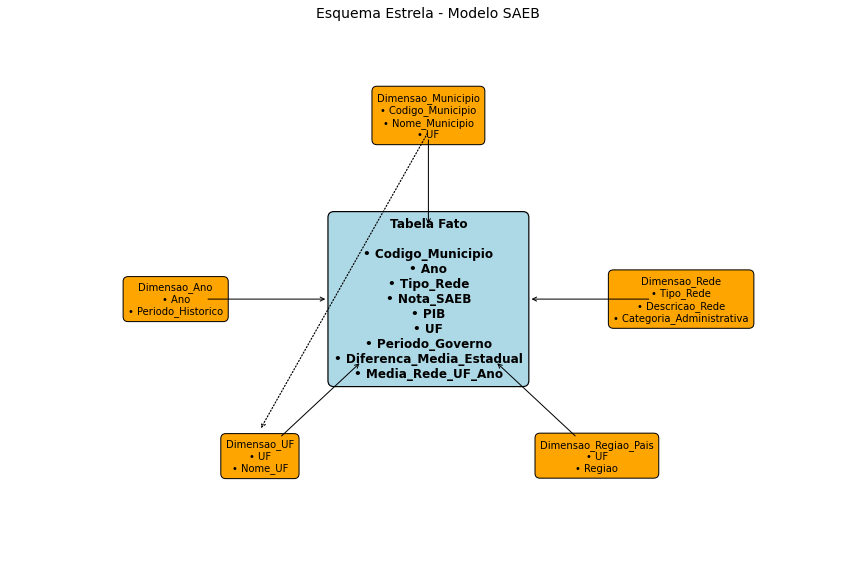

In [0]:
# Import das bibliotecas necessárias
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.font_manager import FontProperties

# Configuração da imagem
fig, ax = plt.subplots(figsize=(12, 8))
ax.set_xlim(0, 10)
ax.set_ylim(0, 10)
ax.axis('off')

# Estilos
title_font = FontProperties(weight='bold', size=12)
box_style = dict(boxstyle='round,pad=0.5', fc='lightblue', ec='black', lw=1.2)
dim_style = dict(boxstyle='round,pad=0.5', fc='orange', ec='black', lw=1)

# Tabela Fato (centro)
ax.text(5, 5, 'Tabela Fato\n\n• Codigo_Municipio\n• Ano\n• Tipo_Rede\n• Nota_SAEB\n• PIB\n• UF\n• Periodo_Governo\n• Diferenca_Media_Estadual\n• Media_Rede_UF_Ano',
        ha='center', va='center', bbox=box_style, fontproperties=title_font)

# Dimensões ao redor
dims = [
    (5, 8.5, 'Dimensao_Municipio\n• Codigo_Municipio\n• Nome_Municipio\n• UF'),
    (2, 5,   'Dimensao_Ano\n• Ano\n• Periodo_Historico'),
    (8, 5,   'Dimensao_Rede\n• Tipo_Rede\n• Descricao_Rede\n• Categoria_Administrativa'),
    (3, 2,   'Dimensao_UF\n• UF\n• Nome_UF'),
    (7, 2,   'Dimensao_Regiao_Pais\n• UF\n• Regiao')
]

# Desenhar dimensões e setas
for x, y, label in dims:
    ax.text(x, y, label, ha='center', va='center', bbox=dim_style)
    
    # Ajusta a posição inicial e o comprimento da seta
    dx = (5 - x) * 0.6  # Controla o comprimento da seta (aumentado de 0.4 para 0.6)
    dy = (5 - y) * 0.6
    arrow_end = (x + dx, y + dy)

    # Definindo onde a seta vai começar (um pouco dentro da caixa)
    start_x = x + dx * 0.2  # Não começa no centro exato
    start_y = y + dy * 0.2

    # Desenha a seta
    ax.annotate("",
                xy=arrow_end,       # Ponta da seta
                xytext=(start_x, start_y),  # Ponto de partida mais próximo da caixa
                arrowprops=dict(arrowstyle='->', lw=1.0))

# Conexão especial UF -> Municipio (relacionamento implícito)
ax.annotate("", xy=(3, 2.5), xytext=(5, 8.2), 
            arrowprops=dict(arrowstyle='->', lw=1.2, linestyle='dotted'))

plt.title('Esquema Estrela - Modelo SAEB', fontsize=14, pad=20)
plt.tight_layout()
plt.show()


### 3.4.3. Catálogo de Dados - Esquema Estrela


**1.Dimensão_Município**

**codigo_municipio**: Dados no formato Integer/String. Diz respeito ao	dódigo IBGE do município.

**Nome_municipio**: Dados no formato String. Coluna que contém o	nome do município de cada UF. 

**uf**: Dados no formato String. Coluna que apresenta a 
sigla da Unidade Federativa (Ex: SP, RJ)

Caso o Databricks permitisse a criação de chaves primárias, para essa dimensão, seria codigo_municipio.

**2. Dimensao_UF**

**uf:** Dados no formato String. Coluna que apresenta a 
sigla da Unidade Federativa.

**Nome_UF**:	Dados no formato String. Coluna que apresenta o nome completo da Unidade Federativa.

Caso o Databricks permitisse a criação de chaves primárias, para essa dimensão, seria uf.

**3. Dimensao_Regiao_Pais**

**uf:** Dados no formato String. Coluna que apresenta a 
sigla da Unidade Federativa.

**Regiao:**	Dados no formato String. Coluna que apresenta os nomes das regiões do país. (Norte, Sul etc.)

Caso o Databricks permitisse a criação de chaves primárias, para essa dimensão, seria uf.

**4. Dimensao_Rede**

**Tipo_Rede:** Dados no formato String.	Nome curto da rede (Estadual, Federal, Pública).

**Descricao_Rede:**	Dados no formato String.	Descrição longa da rede de ensino.

**Categoria_Administrativa:**	Dados no formato String.	Tipo de administração (fixo: "Pública").

Caso o Databricks permitisse a criação de chaves primárias, para essa dimensão, seria Tipo_Rede.

**5. Dimensao_Ano**


**Ano:** Dados no formato	Integer.Coluna que contém o	Ano de realização da prova SAEB.

**Periodo_Historico**: Dados no formato String.Classificação histórica por contexto político e sanitário.

Caso o Databricks permitisse a criação de chaves primárias, para essa dimensão, seria Ano.



**TABELA FATO**

**Codigo_Municipio**: Dados no formato	INT / STRING. Coluna que apresenta o código do município (IBGE). 

**Ano:** Dados no formato INT. Coluna que apresenta o	ano de aplicação da prova SAEB.

**Tipo_Rede**: Dados no formato STRING. Coluna que apresenta o tipo da rede de ensino: Estadual, Federal ou Pública.

**Nota_SAEB**:	Dados no formato decimal(10,2).	 Coluna que apresenta a nota média obtida pelos estudantes no SAEB no ano correspondente.

**PIB:**	Dados no formato FLOAT.	 Coluna que apresenta o Produto Interno Bruto do município no ano em questão.

**UF:**	Dados no formato STRING.	 Coluna que apresenta a sigla da unidade federativa à qual o município pertence.

**periodo_governo:** Dados no formato	STRING.	Coluna que apresenta período de governo associado ao ano (ex: "Pandemia", "Reformas", etc.).

**Diferenca_Media_Estadual:** Dados no formato decimal(15,6).	Diferença entre a nota do município e a média estadual no mesmo ano.

**Media_Rede_UF_Ano**: Dados no formato	decimal(14,6). Coluna que apresenta	Média da nota do SAEB por tipo de rede, UF e ano. Indicador útil para análise comparativa.

Possíveis chaves estrangeiras, caso o Databricks permitisse a criação destas: 

Coluna Codigo_Municipio	> Dimensao_Municipio(codigo_municipio)

Coluna Ano > Dimensao_Ano(ano) 

Coluna Tipo_Rede	> Dimensao_Rede(tipo_rede)

Coluna UF > Dimensao_UF(uf)

Coluna UF	> Dimensao_Regiao_Pais(uf)



### 4. Respondendo às perguntas inicialmente propostas

Nesta secção, realizar-se-ão consultas SQL para responder às perguntas de investigação propostas na Introdução do trabalho. A partir dos resultados obtidos, promove-se uma breve discussão e até mesmo, outras consultas para observar particulareidades de cada questionamento feito inicialmente. 

**1) O desempenho dos alunos, por município, ao longo dos anos piorou, melhorou ou manteve-se estável?**

In [0]:
%sql
SELECT 
  m.Codigo_Municipio,
  m.Nome_Municipio,
  -- Calcular a média de notas por município e ano
  AVG(CASE WHEN t.Ano = 2017 THEN t.Nota_SAEB ELSE NULL END) AS Media_2017,
  AVG(CASE WHEN t.Ano = 2023 THEN t.Nota_SAEB ELSE NULL END) AS Media_2023,
  -- Comparar as médias e classificar
  CASE 
    WHEN AVG(CASE WHEN t.Ano = 2023 THEN t.Nota_SAEB ELSE NULL END) > AVG(CASE WHEN t.Ano = 2017 THEN t.Nota_SAEB ELSE NULL END) THEN 'Melhorou'
    WHEN AVG(CASE WHEN t.Ano = 2023 THEN t.Nota_SAEB ELSE NULL END) < AVG(CASE WHEN t.Ano = 2017 THEN t.Nota_SAEB ELSE NULL END) THEN 'Piorou'
    ELSE 'Estável'
  END AS Tendencia
FROM tabela_fato t
JOIN Dimensao_Municipio m ON t.Codigo_Municipio = m.Codigo_Municipio
WHERE t.Ano IN (2017, 2023)
GROUP BY m.Codigo_Municipio, m.Nome_Municipio
ORDER BY m.Nome_Municipio;


Codigo_Municipio Nome_Municipio Media_2017 Media_2023 Tendencia 5200050 Abadia de Goiás 259.200000 285.580000 Melhorou 3100104 Abadia dos Dourados 282.420000 286.530000 Melhorou 5200100 Abadiânia 268.160000 276.550000 Melhorou 1500107 Abaetetuba 253.246667 258.440000 Melhorou 3100203 Abaeté 303.350000 289.860000 Piorou 2300101 Abaiara 264.910000 266.530000 Melhorou 2900207 Abaré 235.040000 241.880000 Melhorou 4100103 Abatiá 254.150000 265.070000 Melhorou 2900108 Abaíra 259.200000 272.170000 Melhorou 4200051 Abdon Batista null 260.130000 Estável 1500131 Abel Figueiredo 235.830000 249.410000 Melhorou 4200101 Abelardo Luz null 267.900000 Estável 3100302 Abre Campo 276.380000 272.710000 Piorou 2600054 Abreu e Lima 258.400000 280.830000 Melhorou 1700251 Abreulândia 263.430000 246.890000 Piorou 3100401 Acaiaca 271.250000 266.990000 Piorou 2900306 Acajutiba 237.750000 240.450000 Melhorou 2300150 Acarape 262.010000 266.110000 Melhorou 2300200 Acaraú 267.450000 286.290000 Melhorou 2400109 Acari 257.650000 265.330000 Melhorou 1500206 Acará 235.780000 246.330000 Melhorou 2200053 Acauã 245.730000 271.440000 Melhorou 4300034 Aceguá 257.710000 290.200000 Melhorou 2300309 Acopiara 268.480000 285.523333 Melhorou 5100102 Acorizal 224.440000 245.060000 Melhorou 1200013 Acrelândia 268.260000 261.660000 Piorou 5200134 Acreúna 267.550000 279.840000 Melhorou 3500105 Adamantina 277.960000 289.920000 Melhorou 5200159 Adelândia 259.310000 248.340000 Piorou 3500204 Adolfo 261.760000 285.400000 Melhorou 4100202 Adrianópolis 235.740000 264.520000 Melhorou 2900355 Adustina 248.140000 274.290000 Melhorou 2600104 Afogados da Ingazeira 257.330000 282.640000 Melhorou 2400307 Afonso Bezerra 227.310000 null Estável 3200102 Afonso Cláudio 292.000000 284.890000 Piorou 2100105 Afonso Cunha 240.070000 null Estável 2600203 Afrânio 251.380000 269.070000 Melhorou 1500305 Afuá null 259.100000 Estável 2600302 Agrestina 262.190000 275.010000 Melhorou 2200103 Agricolândia null 280.970000 Estável 4200200 Agrolândia 224.180000 null Estável 4200309 Agronômica null 266.620000 Estável 3100807 Aguanil 282.560000 288.860000 Melhorou 3500303 Aguaí 272.900000 273.830000 Melhorou 4300109 Agudo 282.080000 302.540000 Melhorou 3500709 Agudos 265.300000 271.610000 Melhorou 4100301 Agudos do Sul 270.530000 297.470000 Melhorou 2500205 Aguiar 232.740000 283.560000 Melhorou 1700301 Aguiarnópolis 253.320000 258.390000 Melhorou 3101102 Aimorés 262.200000 271.110000 Melhorou 2900603 Aiquara 246.950000 270.570000 Melhorou 2300408 Aiuaba 260.480000 264.750000 Melhorou 3101201 Aiuruoca 291.860000 300.710000 Melhorou 4300208 Ajuricaba 276.250000 302.410000 Melhorou 3101300 Alagoa 282.230000 297.250000 Melhorou 2500304 Alagoa Grande 243.360000 257.160000 Melhorou 2500403 Alagoa Nova 254.400000 null Estável 2600609 Alagoinha 261.840000 255.760000 Piorou 2500502 Alagoinha 260.190000 236.580000 Piorou 2200251 Alagoinha do Piauí 262.110000 264.520000 Melhorou 2900702 Alagoinhas 256.920000 271.895000 Melhorou 3500758 Alambari 270.040000 262.430000 Piorou 3101409 Albertina 301.700000 299.110000 Piorou 2500536 Alcantil 263.160000 301.620000 Melhorou 5000252 Alcinópolis 264.630000 273.740000 Melhorou 2900801 Alcobaça 231.790000 259.340000 Melhorou 2100204 Alcântara 244.935000 239.700000 Piorou 2300507 Alcântaras 267.190000 277.910000 Melhorou 2100303 Aldeias Altas 241.470000 null Estável 4300307 Alecrim 296.550000 293.690000 Piorou 3200201 Alegre 284.293333 277.440000 Piorou 4300406 Alegrete 266.740000 275.590000 Melhorou 2200277 Alegrete do Piauí 244.940000 266.730000 Melhorou 4300455 Alegria 280.660000 296.620000 Melhorou 1500404 Alenquer 237.100000 252.200000 Melhorou 2400505 Alexandria 259.590000 284.500000 Melhorou 5200308 Alexânia 261.660000 276.560000 Melhorou 3101607 Alfenas 262.570000 275.570000 Melhorou 3200300 Alfredo Chaves 279.780000 304.180000 Melhorou 3500808 Alfredo Marcondes 269.670000 256.870000 Piorou 3101631 Alfredo Vasconcelos 269.900000 null Estável 4200705 Alfredo Wagner 235.390000 

In [0]:
%sql
SELECT 
  Tendencia,
  COUNT(*) AS Quantidade_Municipios
FROM (
  SELECT 
    m.Codigo_Municipio,
    m.Nome_Municipio,
    -- Calcular a média de notas por município e ano
    AVG(CASE WHEN t.Ano = 2017 THEN t.Nota_SAEB ELSE NULL END) AS Media_2017,
    AVG(CASE WHEN t.Ano = 2023 THEN t.Nota_SAEB ELSE NULL END) AS Media_2023,
    -- Comparar as médias e classificar
    CASE 
      WHEN AVG(CASE WHEN t.Ano = 2023 THEN t.Nota_SAEB ELSE NULL END) > AVG(CASE WHEN t.Ano = 2017 THEN t.Nota_SAEB ELSE NULL END) THEN 'Melhorou'
      WHEN AVG(CASE WHEN t.Ano = 2023 THEN t.Nota_SAEB ELSE NULL END) < AVG(CASE WHEN t.Ano = 2017 THEN t.Nota_SAEB ELSE NULL END) THEN 'Piorou'
      ELSE 'Estável'
    END AS Tendencia
  FROM tabela_fato t
  JOIN Dimensao_Municipio m ON t.Codigo_Municipio = m.Codigo_Municipio
  WHERE t.Ano IN (2017, 2023)
  GROUP BY m.Codigo_Municipio, m.Nome_Municipio
) AS Subconsulta
GROUP BY Tendencia;


Tendencia Quantidade_Municipios Estável 574 Piorou 1207 Melhorou 3691

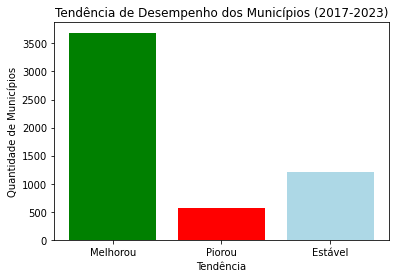

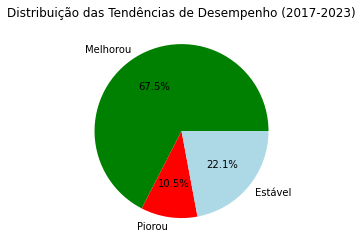

In [0]:
#Criando gráficos para ilustrar os resultados obtidos com as consultas SQL
# Import da biblioteca necessária
import matplotlib.pyplot as plt

# Dados obtidos pela consulta SQL
tendencias = ['Melhorou', 'Piorou', 'Estável']
quantidade_municipios = [3691, 574, 1207]  # Substitua pelos resultados da consulta

# Criando gráfico de barras
plt.bar(tendencias, quantidade_municipios, color=['green', 'red', 'lightblue'])
plt.title('Tendência de Desempenho dos Municípios (2017-2023)')
plt.xlabel('Tendência')
plt.ylabel('Quantidade de Municípios')
plt.show()

# Ou gráfico de pizza
plt.pie(quantidade_municipios, labels=tendencias, autopct='%1.1f%%', colors=['green', 'red', 'lightblue'])
plt.title('Distribuição das Tendências de Desempenho (2017-2023)')
plt.show()


**Resposta:** A partir dos resultados obtidos com a consulta SQL, pode-se dizer que o desempenhos dos alunos, no geral, melhorou quando comparamos os resultados entre 2017 e 2023. Dos municicípios avaliados, 3691 apresentaram melhora nos resultados.

**2)** **Pensando no país como um todo, há diferenças de desempenho entre os alunos da rede estadual e federal?**

In [0]:
%sql
SELECT 
  r.Tipo_Rede,
  AVG(t.Nota_SAEB) AS Media_Nota_SAEB
FROM tabela_fato t
JOIN Dimensao_Rede r ON t.Tipo_Rede = r.Tipo_Rede
WHERE r.Tipo_Rede IN ('Estadual', 'Federal')  -- Filtro para redes estadual e federal
GROUP BY r.Tipo_Rede
ORDER BY Media_Nota_SAEB DESC;


Tipo_Rede Media_Nota_SAEB Federal 314.930313 Estadual 266.863436

**Resposta:** Verificou-se que a média obtida no SAEB foi mais alta para os alunos das escolas federais, atingindo o valor de 314,93; ao passo que para as escolas estaduais, a nota média foi 266,86.

**3) **Considerando cada uma das 5 regiões, há diferenças de desempenho entre os alunos da rede estadual e federal?****

In [0]:
%sql
SELECT 
  dr.Regiao,                -- Região
  r.Tipo_Rede,              -- Tipo de Rede (Estadual ou Federal)
  AVG(t.Nota_SAEB) AS Media_Nota_SAEB  -- Média das Notas do SAEB
FROM tabela_fato t
JOIN Dimensao_Rede r ON t.Tipo_Rede = r.Tipo_Rede     -- Relacionamento com a dimensão de Rede
JOIN Dimensao_Municipio m ON t.Codigo_Municipio = m.Codigo_Municipio  -- Relacionamento com a dimensão de Município
JOIN Dimensao_UF du ON m.uf = du.uf              -- Relacionamento com a dimensão de UF
JOIN Dimensao_Regiao_Pais dr ON du.uf = dr.uf    -- Relacionamento com a dimensão de Região
WHERE r.Tipo_Rede IN ('Estadual', 'Federal')     -- Considerando apenas as redes estadual e federal
GROUP BY dr.Regiao, r.Tipo_Rede                   -- Agrupando por região e tipo de rede
ORDER BY 
  CASE dr.Regiao                                    -- Ordenando pelas regiões
    WHEN 'Norte' THEN 1
    WHEN 'Nordeste' THEN 2
    WHEN 'Centro-Oeste' THEN 3
    WHEN 'Sudeste' THEN 4
    WHEN 'Sul' THEN 5
    ELSE 6
  END, 
  Media_Nota_SAEB DESC;                            -- Ordenando pela média das notas


Regiao Tipo_Rede Media_Nota_SAEB Norte Federal 295.991594 Norte Estadual 250.844652 Nordeste Federal 307.769643 Nordeste Estadual 257.518137 Centro-Oeste Federal 309.577288 Centro-Oeste Estadual 270.929275 Sudeste Federal 329.601591 Sudeste Estadual 273.665297 Sul Federal 319.079346 Sul Estadual 276.348621

**Resposta:** Para todas as regiões analisadas, as escolas federais aprensentam melhores resultados. 

**4)** **Há alguma relação entre um melhor desempenho e o PIB da região a qual o aluno pertence?**

In [0]:
%sql
SELECT 
  dr.Regiao AS Regiao,                  -- Região
  AVG(t.Nota_SAEB) AS Media_Nota_SAEB,   -- Média das Notas do SAEB
  ROUND(AVG(t.PIB), 2) AS Media_PIB      -- Média do PIB na região, arredondada para 2 casas decimais
FROM tabela_fato t
JOIN Dimensao_Municipio m ON t.Codigo_Municipio = m.Codigo_Municipio  -- Relacionamento com a dimensão de Município
JOIN Dimensao_UF du ON m.uf = du.uf              -- Relacionamento com a dimensão de UF
JOIN Dimensao_Regiao_Pais dr ON du.uf = dr.uf    -- Relacionamento com a dimensão de Região
WHERE t.Ano != 2023                          -- Excluindo o ano de 2023, pois não há dados de PIB
GROUP BY dr.Regiao                          -- Agrupando por região
ORDER BY 
  CASE dr.Regiao                                -- Ordenando pelas regiões
    WHEN 'Norte' THEN 1
    WHEN 'Nordeste' THEN 2
    WHEN 'Centro-Oeste' THEN 3
    WHEN 'Sudeste' THEN 4
    WHEN 'Sul' THEN 5
    ELSE 6
  END;


Regiao Media_Nota_SAEB Media_PIB Norte 250.432541 3.315340847E7 Nordeste 257.371254 2.927388494E7 Centro-Oeste 271.170817 6.115140777E7 Sudeste 274.989011 5.444625316E7 Sul 275.351561 2.801085597E7

Databricks visualization. Run in Databricks to view.

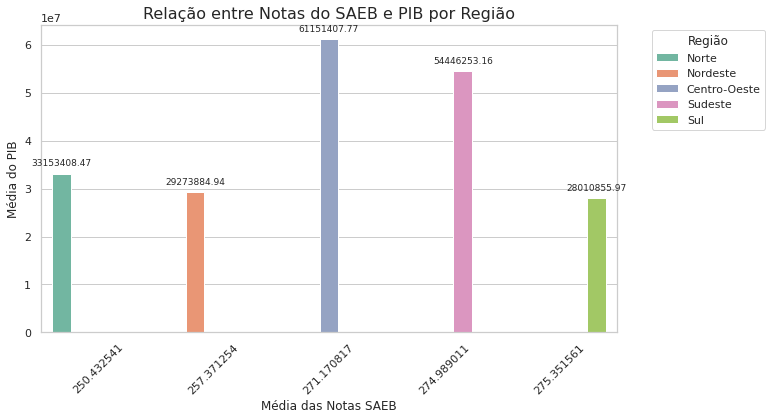

In [0]:
# Import das bibliotecas necessárias
import matplotlib.pyplot as plt
import seaborn as sns

# Considerando que o DataFrame df já está pronto
# Ajustando o gráfico para eixo X = Notas SAEB e eixo Y = PIB
plt.figure(figsize=(9, 6))
sns.set(style="whitegrid")

# Criando o gráfico de barras
ax = sns.barplot(data=df, x="Media_Nota_SAEB", y="Media_PIB", hue="Regiao", palette="Set2")

# Adicionando os valores nas barras
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=9, xytext=(0, 6),
                textcoords='offset points')

# Ajustando título e rótulos
plt.title("Relação entre Notas do SAEB e PIB por Região", fontsize=16)
plt.xlabel("Média das Notas SAEB", fontsize=12)
plt.ylabel("Média do PIB", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(title="Região", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


**Resposta**: Não parece haver uma relação direta entre um maior PIB por região e uma nota mais alta na prova SAEB para a disciplina de Língua Portuguesa. A região Norte, por exemplo, apresenta uma PIB mais elevado do que a região Nordeste. No entanto, a nota da primeira é menor do que a da última. Tal fato tem sentido, principalmente, se considerarmos que cada município dividirá seus ganhos financeiros de maneiras diferentes. Isto é, não necessariamente, ao obter mais lucro de suas atividades financeiras, um município investirá mais em educação. 

**5)** **Quais os municípios ocupam as 5 melhores posições em relação ao seu desempenho no SAEB para cada ano? Esses mesmos municípios estão entre os 100 maiores PIBs do país?**

In [0]:
%sql
WITH melhores_municipios AS (
    SELECT 
        m.Codigo_Municipio, 
        m.Nome_Municipio,
        t.Ano,
        t.Nota_SAEB,
        RANK() OVER (PARTITION BY t.Ano ORDER BY t.Nota_SAEB DESC) AS ranking
    FROM tabela_fato t
    JOIN Dimensao_Municipio m ON t.Codigo_Municipio = m.Codigo_Municipio
    WHERE t.Nota_SAEB IS NOT NULL
)
SELECT 
    Codigo_Municipio,
    Nome_Municipio,
    Ano,
    Nota_SAEB
FROM melhores_municipios
WHERE ranking <= 5
ORDER BY Ano, ranking;


Codigo_Municipio Nome_Municipio Ano Nota_SAEB 3205309 Vitória 2017 371.73 4308102 Feliz 2017 363.93 3303401 Nova Friburgo 2017 355.51 3202405 Guarapari 2017 355.15 3201308 Cariacica 2017 353.48 3205200 Vila Velha 2019 363.46 3510500 Caraguatatuba 2019 356.67 3122306 Divinópolis 2019 356.34 3170701 Varginha 2019 355.79 3301702 Duque de Caxias 2019 350.36 3168705 Timóteo 2021 349.23 2402006 Caicó 2021 339.02 3114105 Carmo de Minas 2021 338.67 3550308 São Paulo 2021 338.51 3529302 Matão 2021 338.47 4307005 Erechim 2023 346.49 4104303 Campo Mourão 2023 346.18 3300100 Angra dos Reis 2023 346.01 3549102 São João da Boa Vista 2023 343.52 3122306 Divinópolis 2023 343.36

In [0]:
%sql
WITH melhores_municipios AS (
    SELECT 
        m.Codigo_Municipio, 
        m.Nome_Municipio,
        t.Ano,
        t.Nota_SAEB,
        t.PIB,
        RANK() OVER (PARTITION BY t.Ano ORDER BY t.Nota_SAEB DESC) AS ranking
    FROM tabela_fato t
    JOIN Dimensao_Municipio m ON t.Codigo_Municipio = m.Codigo_Municipio
    WHERE t.Nota_SAEB IS NOT NULL
    AND t.Ano != 2023  -- Excluindo o ano de 2023
)
SELECT 
    Codigo_Municipio,
    Nome_Municipio,
    Ano,
    Nota_SAEB,
    PIB
FROM melhores_municipios
WHERE ranking <= 5
ORDER BY Ano, ranking;


Codigo_Municipio Nome_Municipio Ano Nota_SAEB PIB 3205309 Vitória 2017 371.73 2.0255652E7 4308102 Feliz 2017 363.93 null 3303401 Nova Friburgo 2017 355.51 null 3202405 Guarapari 2017 355.15 null 3201308 Cariacica 2017 353.48 null 3205200 Vila Velha 2019 363.46 1.2859638E7 3510500 Caraguatatuba 2019 356.67 null 3122306 Divinópolis 2019 356.34 null 3170701 Varginha 2019 355.79 null 3301702 Duque de Caxias 2019 350.36 4.5332368E7 3168705 Timóteo 2021 349.23 null 2402006 Caicó 2021 339.02 null 3114105 Carmo de Minas 2021 338.67 null 3550308 São Paulo 2021 338.51 8.2898061E8 3529302 Matão 2021 338.47 null

**Resposta:** Observando os resultados obtidos, pode-se perceber que não há uma correlação entre estar nos 5 primeiros colocados no SAEB e ser um dos 100 municípios mais ricos do país. Na verdade, entre os 5 primeiros colocados para cada ano, a maior parte dos municípios não integra o grupo dos 100 mais ricos. 

**6) Quantos municípios, de cada uma das 5 regiões do Brasil, Norte, Sul, Sudeste, Nordeste e Centro-Oeste, alcançaram o valor 400 nas notas finais?**

In [0]:
%sql
SELECT 
  dr.Regiao AS Regiao,
  COUNT(DISTINCT m.Codigo_Municipio) AS Municipios_Acima_400
FROM tabela_fato t
JOIN Dimensao_Municipio m ON t.Codigo_Municipio = m.Codigo_Municipio
JOIN Dimensao_UF du ON m.uf = du.uf
JOIN Dimensao_Regiao_Pais dr ON du.uf = dr.uf
WHERE t.Nota_SAEB = 400
GROUP BY dr.Regiao
ORDER BY 
  CASE dr.Regiao
    WHEN 'Norte' THEN 1
    WHEN 'Nordeste' THEN 2
    WHEN 'Centro-Oeste' THEN 3
    WHEN 'Sudeste' THEN 4
    WHEN 'Sul' THEN 5
    ELSE 6
  END;


Regiao Municipios_Acima_400

**Resposta:** Nenhum município atingiu a nota 400 na prova de Língua Portuguesa do SAEB.

De fato, atingir uma nota tão alta em exames desse estilo, não é tarefa fácil. Levando isso em consideração, pode-se ajustar a consulta anterior para obter o número de municípios de cada uma das 5 regiões do Brasil que tenha obtido resultados entre 350 e 400. 

In [0]:
%sql
SELECT 
  dr.Regiao AS Regiao,
  COUNT(DISTINCT m.Codigo_Municipio) AS Municipios_Desempenho
FROM tabela_fato t
JOIN Dimensao_Municipio m ON t.Codigo_Municipio = m.Codigo_Municipio
JOIN Dimensao_UF du ON m.uf = du.uf
JOIN Dimensao_Regiao_Pais dr ON du.uf = dr.uf
WHERE 
  t.Nota_SAEB BETWEEN 350 AND 400  -- Criação de faixa de distribuição de notas
GROUP BY dr.Regiao
ORDER BY 
  CASE dr.Regiao
    WHEN 'Norte' THEN 1
    WHEN 'Nordeste' THEN 2
    WHEN 'Centro-Oeste' THEN 3
    WHEN 'Sudeste' THEN 4
    WHEN 'Sul' THEN 5
    ELSE 6
  END;


Regiao Municipios_Desempenho Nordeste 1 Sudeste 12 Sul 2

**Resposta:** Das 5 regiões brasileiras, apenas 3 possuem municípios que obtiveram resultados entre 350 e 400, respectivamente: 1) Nordeste, com 1 município; 2) Sudeste, com 12 municípios; 3) Sul, com 2 municípios. 

Como explicado anteriormente, notas na faixa 350 - 400, equivalem aos níveis 6 e 7 de domínio da Língua Portuguesa, mostrando que os alunos dominam diferentes gêneros textuais, reconhecem e compreendem ironia e humor, além de interpretar recursos gráficos em artigos. Notas nessa faixa demonstram que os alunos atingiram um bom nível de proficiência da Língua Portuguesa. No entanto, parece ser alarmante que apenas 15 municípios dos mais de 5.000 municípios avaliados atinjam tal resultado. 

**7)** **Quais foram as tendências de desempenho do SAEB ao longo dos governos?**

In [0]:
%sql
SELECT 
  periodo_governo,
  ROUND(AVG(Nota_SAEB), 2) AS media_nota_saeb
FROM tabela_fato
WHERE Nota_SAEB IS NOT NULL
GROUP BY periodo_governo
ORDER BY periodo_governo;

periodo_governo media_nota_saeb Governo Bolsonaro 271.49 Governo Lula III 270.14 Governo Temer 260.57

/databricks/spark/python/pyspark/sql/pandas/utils.py:124: UserWarning: The conversion of DecimalType columns is inefficient and may take a long time. Column names: [media_nota_saeb] If those columns are not necessary, you may consider dropping them or converting to primitive types before the conversion.
  warnings.warn(


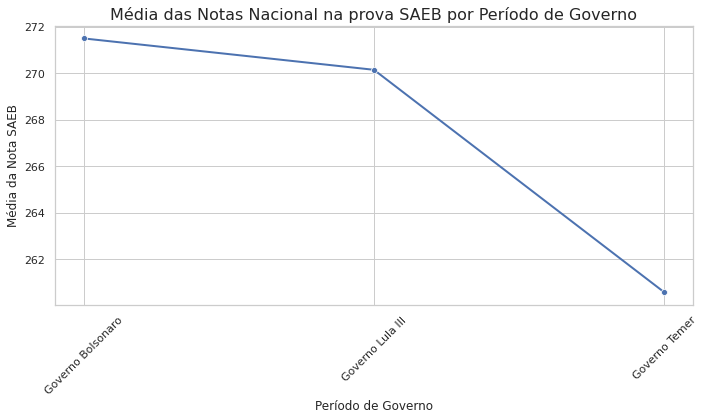

In [0]:
# Criando gráfico para ilustrar a consulta realizada
# Import das bibliotecas
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Executando a consulta SQL
query = """
SELECT 
  periodo_governo,
  ROUND(AVG(Nota_SAEB), 2) AS media_nota_saeb
FROM tabela_fato
WHERE Nota_SAEB IS NOT NULL
GROUP BY periodo_governo
ORDER BY periodo_governo;
"""

# Armazenando o resultado da consulta em um DataFrame Pandas
df = spark.sql(query).toPandas()

# Ajustando o gráfico
plt.figure(figsize=(10, 6))

# Criando o gráfico de linha
sns.lineplot(x="periodo_governo", y="media_nota_saeb", data=df, marker="o", color="b", linewidth=2)

# Título e labels
plt.title('Média das Notas Nacional na prova SAEB por Período de Governo', fontsize=16)
plt.xlabel('Período de Governo', fontsize=12)
plt.ylabel('Média da Nota SAEB', fontsize=12)

# Exibindo o gráfico
plt.xticks(rotation=45)
plt.tight_layout()

# Mostrando o gráfico
plt.show()


**Resposta:** Observando o panorama geral, é possível perceber que os alunos apresentaram pior desempenho durante o governo Temer. Quanto aos dados obtidos para os Governos Lula III e Bolsonaro, os resultados foram ligeiramente melhores no último governo citado.

A partir da consulta anterior, surgiu a ideia de realizar outra consulta, porém, levando em consideração as regiões do país.

In [0]:
%sql
SELECT 
  t.periodo_governo,
  dr.Regiao AS regiao,
  ROUND(AVG(t.Nota_SAEB), 2) AS media_nota_saeb
FROM tabela_fato t
JOIN Dimensao_Municipio m ON t.Codigo_Municipio = m.Codigo_Municipio
JOIN Dimensao_UF du ON m.uf = du.uf
JOIN Dimensao_Regiao_Pais dr ON du.uf = dr.uf
WHERE t.Nota_SAEB IS NOT NULL
GROUP BY t.periodo_governo, dr.Regiao
ORDER BY t.periodo_governo, dr.Regiao;


periodo_governo regiao media_nota_saeb Governo Bolsonaro Centro-Oeste 274.69 Governo Bolsonaro Nordeste 262.76 Governo Bolsonaro Norte 253.28 Governo Bolsonaro Sudeste 277.60 Governo Bolsonaro Sul 281.01 Governo Lula III Centro-Oeste 273.89 Governo Lula III Nordeste 261.84 Governo Lula III Norte 256.16 Governo Lula III Sudeste 274.66 Governo Lula III Sul 282.30 Governo Temer Centro-Oeste 266.14 Governo Temer Nordeste 249.34 Governo Temer Norte 246.66 Governo Temer Sudeste 270.78 Governo Temer Sul 266.68

/databricks/spark/python/pyspark/sql/pandas/utils.py:124: UserWarning: The conversion of DecimalType columns is inefficient and may take a long time. Column names: [media_nota_saeb] If those columns are not necessary, you may consider dropping them or converting to primitive types before the conversion.
  warnings.warn(


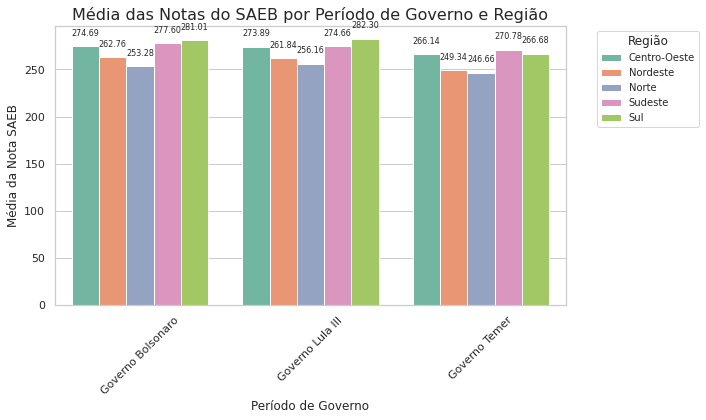

In [0]:
# Criando um gráfico que reflete a consulta anterior
# Import de bibliotecas necessárias
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Executando a consulta SQL
query = """
SELECT 
  t.periodo_governo,
  dr.Regiao AS regiao,
  ROUND(AVG(t.Nota_SAEB), 2) AS media_nota_saeb
FROM tabela_fato t
JOIN Dimensao_Municipio m ON t.Codigo_Municipio = m.Codigo_Municipio
JOIN Dimensao_UF du ON m.uf = du.uf
JOIN Dimensao_Regiao_Pais dr ON du.uf = dr.uf
WHERE t.Nota_SAEB IS NOT NULL
GROUP BY t.periodo_governo, dr.Regiao
ORDER BY t.periodo_governo, dr.Regiao;
"""

# Armazenando o resultado da consulta em um DataFrame Pandas
df = spark.sql(query).toPandas()

# Ajustando o gráfico
plt.figure(figsize=(10, 6))

# Criando o gráfico de barras agrupadas
sns.barplot(x="periodo_governo", y="media_nota_saeb", hue="regiao", data=df, palette="Set2")

# Adicionando os valores das médias no gráfico
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height():.2f}', 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       xytext=(0, 9),  # Definindo o deslocamento do texto
                       textcoords='offset points', ha='center', va='bottom', fontsize=8)

# Título e labels
plt.title('Média das Notas do SAEB por Período de Governo e Região', fontsize=16)
plt.xlabel('Período de Governo', fontsize=12)
plt.ylabel('Média da Nota SAEB', fontsize=12)

# Ajustando a posição da legenda para fora do gráfico
plt.legend(title="Região", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)

# Exibindo o gráfico
plt.xticks(rotation=45)
plt.tight_layout()

# Mostrando o gráfico
plt.show()


**Resposta:** Realizando a mesma análise, porém para cada região do país os resultandos mantêm-se iguais: Durante os governos Lula III e Bolsonaro, os resultados na prova SAEB para a disciplina de Língua Portuguesa foram melhores. 

### 5. Auto avaliação e conclusões

O presente trabalho dedicou-se a avaliar os resultados na prova de Língua Portuguesa do SAEB para os anos de 2017, 2019, 2021, 2023. Tais dados foram cruzados com os PIBs dos 100 municípios mais ricos do país. Este trabalho torna-se relevante para o campo educacional, pois permite não só oferecer indicadores que mereçam atenção por parte dos governos locais e federal, como também servir para que professores e profissionais da educação entendam melhor o panorama da educação em seu município, estado e país.

É importante destacar que por limitações de tempo, o presente trabalho não levou em consideração algumas análises que poderiam torná-lo ainda mais rico, como observar a influência da pandemia nos resultados ou ainda confrontar dados entre municípios e estados.Além disso, outras etapas da escolaridade básica poderiam ser analisada para obter um panorama ainda mais geral. Ficam abertas as possibilidades para futuros desenvolvimentos.

Por fim, é necessário ressaltar que a ausência de dados de PIB tornou o presente trabalho mais limitado. Seria interessante obter dados de PIB para todos os municípios e para todos os anos analisados aqui. 


### 6. Materiais e ferramentas utilizados

Ferramentas utilizadas: Databricks Community. 

Dados SAEB - Disponível em: https://dados.gov.br/dados/conjuntos-dados/inep-indicador-educacional-da-educacao-basica-indice-de-desenvolvimento-da-educacao-basica-ideb

Dados PIB para os municípios brasileiros. Disponível em: https://www.ibge.gov.br/estatisticas/economicas/contas-nacionais/9088-produto-interno-bruto-dos-municipios.html?=&t=resultados

Escalas de Nota Prova SAEB: https://download.inep.gov.br/educacao_basica/prova_brasil_saeb/escala/escala_proficiencia/2018/LP_3EM.pdf

GOMES, Manoel Messias. _Saeb_: definição, características e perspectivas. Revista Educação Pública, v. 19, nº 6, 26 de março de 2019. Disponível em: https://educacaopublica.cecierj.edu.br/artigos/19/6/saeb-definicao-caracteristicas-e-perspectivas